# TASK 2 : Color Identification in images 

                                                                                         GRIP    : The Sparks Foundation

                                                                                         Function: Iot and Computer Vision

                                                                                         Batch   : January 2021
                                                                          
                                                                                         Author  : Charith

# Color Identification in images


Here colors are extracted  from images using KMeans algorithm and filtered images are selected from a collection of images based on RGB values of colors





# Importing necessary packages and libraries

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import pandas as pd

%matplotlib inline

# Loading image

The type of this input is <class 'numpy.ndarray'>
Shape: (656, 875, 3)


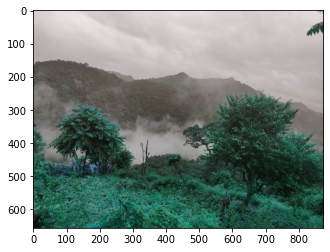

In [33]:
image = cv2.imread('images/1.jpeg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

Converting the rendering to Red Green Blue (RGB).

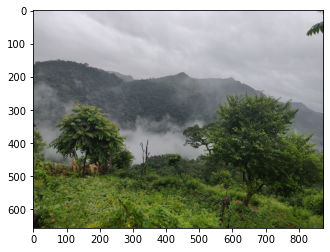

In [34]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Converting the image to grayscale.

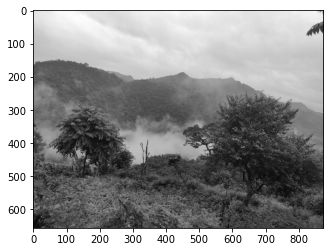

In [35]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

# Defining functions

 Function that will convert RGB to hex so that we can use them as labels for our pie chart.

In [36]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

 Function to get image from the respective location.

In [37]:
def get_image(image_path):
    image = cv2.imread('images/'+image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

Function to  extract the top colors from the image and display them as a pie chart

In [38]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

# Result

[array([235.34259558,  38.79298562,  31.28125201]),
 array([226.51020774, 218.73278004, 236.31706755]),
 array([ 56.57217417, 191.20891739, 120.57951834]),
 array([ 48.6716656 , 123.32392044, 198.14098064]),
 array([217.12838733,  54.70415648, 145.90209861]),
 array([235.36059407, 213.42279006,  59.35983743]),
 array([123.55331459, 212.02665729, 201.26754623]),
 array([244.66821048, 112.64539811,  32.77044738])]

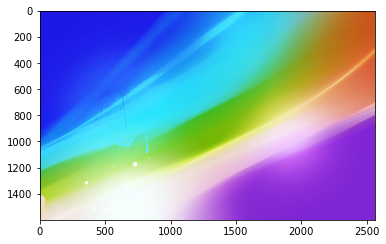

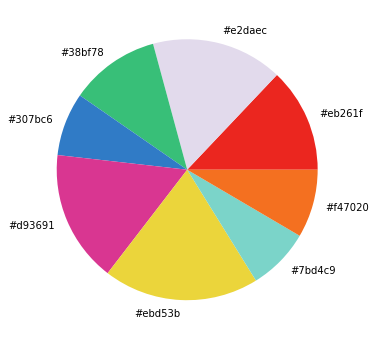

In [39]:
#Pie-Chart will display top 8 colors of the image
plt.imshow(cv2.imread("images/intro.jpg"))
get_colors(get_image('intro.jpg'), 8, True)

Defining image directory path

In [40]:
x=os.getcwd()
print(x)
y=os.listdir(x+'\images')
print(y)

C:\Users\chaku\GRIP\TASK2
['1.jpeg', '10.jpg', '2.PNG', '3.PNG', '4.PNG', '5.jpg', '6.jpg', '7.jpg', '9.jpg', 'intro.jpg']


In [41]:
COLORS = {
    'WHITE' : [255,255,255],
    'PINK': [227,0,235],
    'RED': [255,0,0],
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 200],
    'YELLOW': [255, 255, 0]
}
images = []


#to get the list of all files and directories in the specified directory.
for x in y:
    images.append(get_image(x))

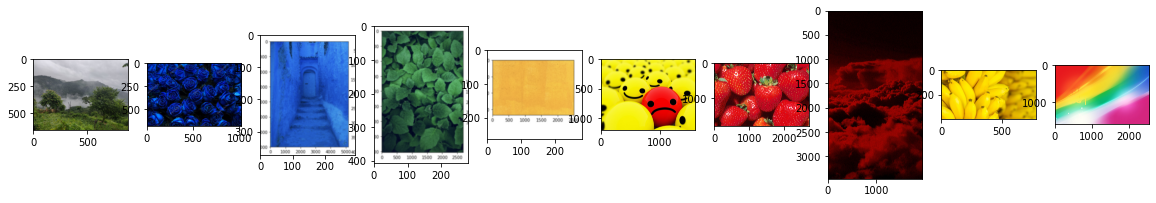

In [42]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

# Functions to get image/s based on the color specified


This function match_image_by_color filters all images that match the selected color.It extracts the image colors using our previously defined method get_colors in RGB format. We use the method rgb2lab to convert the selected color to a format we can compare. The for loop simply iterates over all the colors retrieved from the image.

In [43]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

This function show_selected_images iterates over all images, calls the above function to filter them based on color and displays them on the screen using imshow.


In [44]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

# Result

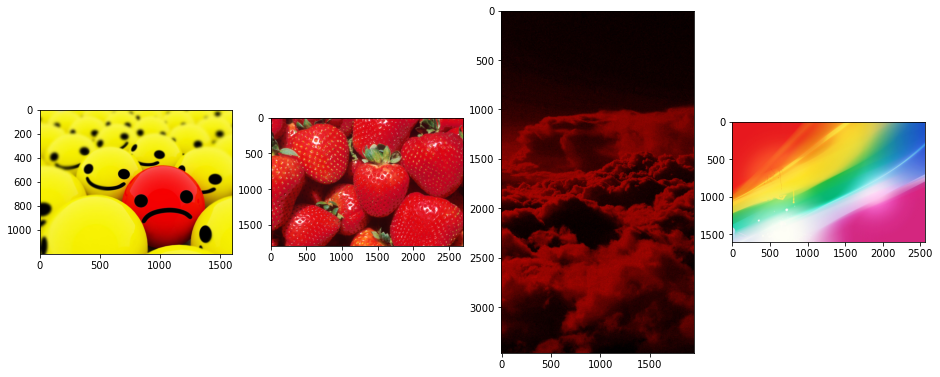

In [45]:
plt.figure(figsize = (20, 10))
show_selected_images(images,COLORS['RED'], 60, 5)

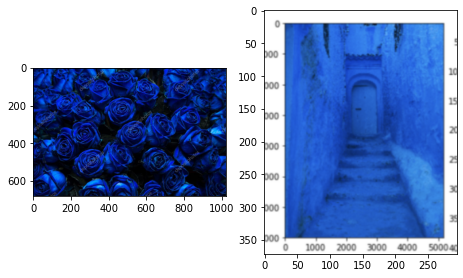

In [46]:
plt.figure(figsize = (20, 10))
show_selected_images(images,COLORS['BLUE'], 60, 5)

# Defining a process to show the color details when doubled clicked at different regions of an image

In [4]:
#importing colors.csv file having details of all colors
csv_path = 'colors.csv'

# reading csv file
index = ['color', 'color_name', 'hex', 'R', 'G', 'B']
df = pd.read_csv(csv_path, names=index, header=None)

# reading image
img = cv2.imread('images/1.jpeg')
img = cv2.resize(img, (800,600))
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#declaring global variables (are used later on)
clicked = False
r = g = b = xpos = ypos = 0

#Reading csv file with pandas and giving names to each column
index=["color","color_name","hex","R","G","B"]
csv = pd.read_csv('colors.csv', names=index, header=None)

#function to calculate minimum distance from all colors and get the most matching color
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

def draw_function(event, x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)
       

cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_function)

while(1):

    cv2.imshow("image",img)
    if (clicked):
   
        #cv2.rectangle(image, startpoint, endpoint, color, thickness)-1 fills entire rectangle 
        cv2.rectangle(img,(20,20), (750,60), (b,g,r), -1)

        #Creating text string to display( Color name and RGB values )
        text = getColorName(r,g,b) + ' R='+ str(r) +  ' G='+ str(g) +  ' B='+ str(b)
        
        #cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
        cv2.putText(img, text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)

        #For very light colours we will display text in black colour
        if(r+g+b>=600):
            cv2.putText(img, text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
            
        clicked=False

    #Break the loop when user hits 'esc' key    
    if cv2.waitKey(20) & 0xFF ==27:
        break
    
cv2.destroyAllWindows()
